In [1]:
# chapter 4 question 14
from ISLP import load_data

Auto = load_data('Auto')

In [2]:
# a
Auto['mpg01'] = (Auto['mpg'] > Auto['mpg'].median()).astype('int')
Auto['mpg01']

0      0
1      0
2      0
3      0
4      0
      ..
387    1
388    1
389    1
390    1
391    1
Name: mpg01, Length: 392, dtype: int32

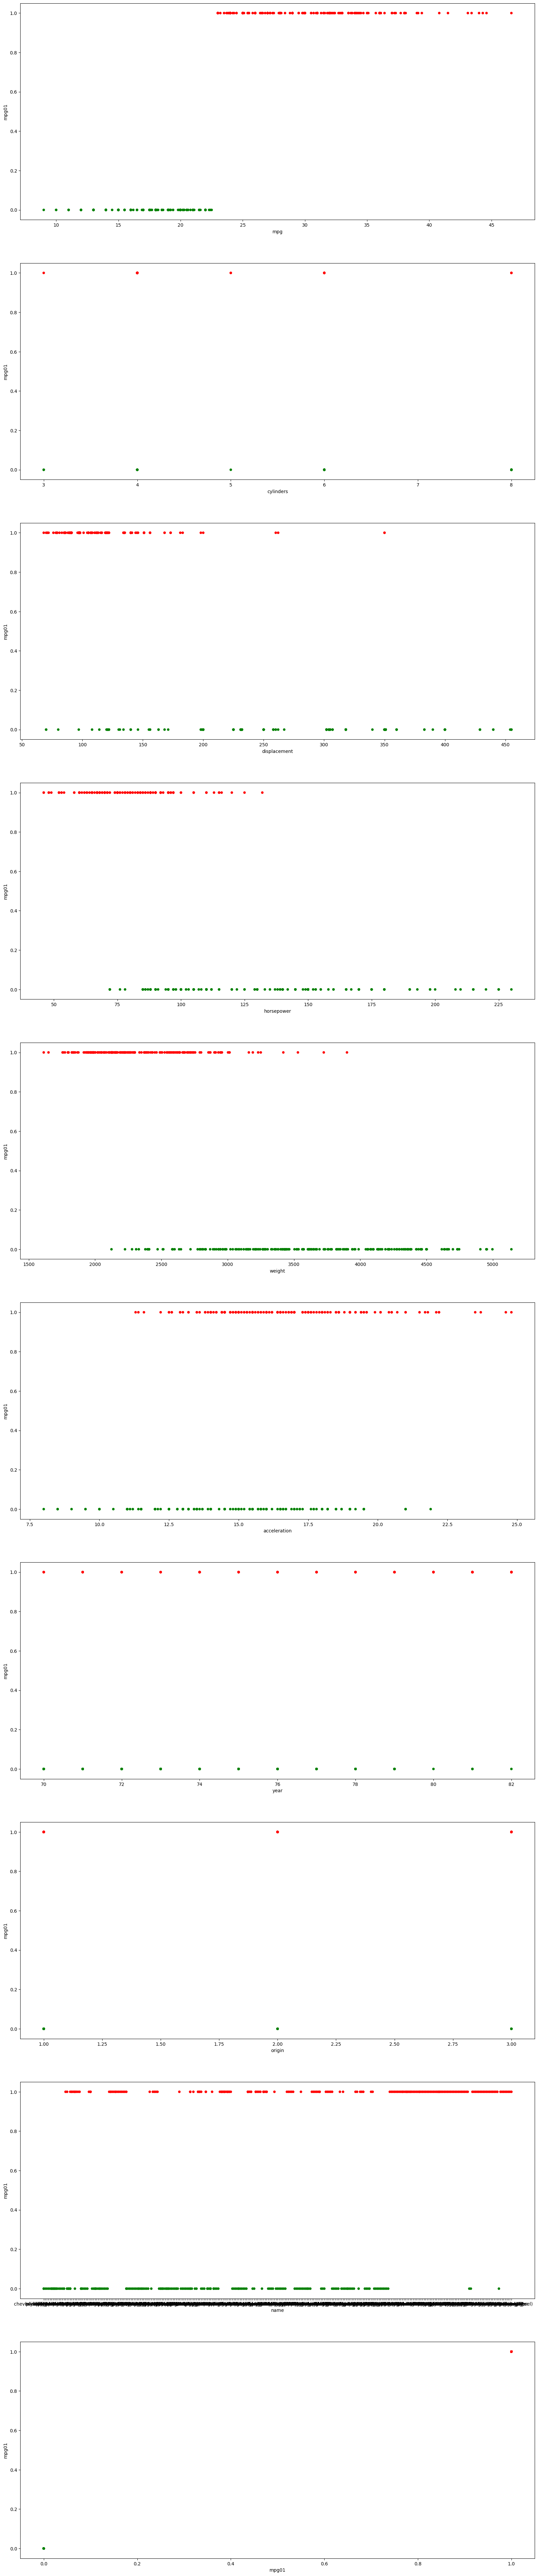

In [3]:
# b 
import matplotlib.pyplot as plt
colors=['green' if l==0 else 'red' for l in Auto['mpg01']]
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20,100))

for col, ax in zip(Auto.columns, axes):
    Auto.plot(kind='scatter', x=col, y='mpg01', ax=ax, color=colors)  

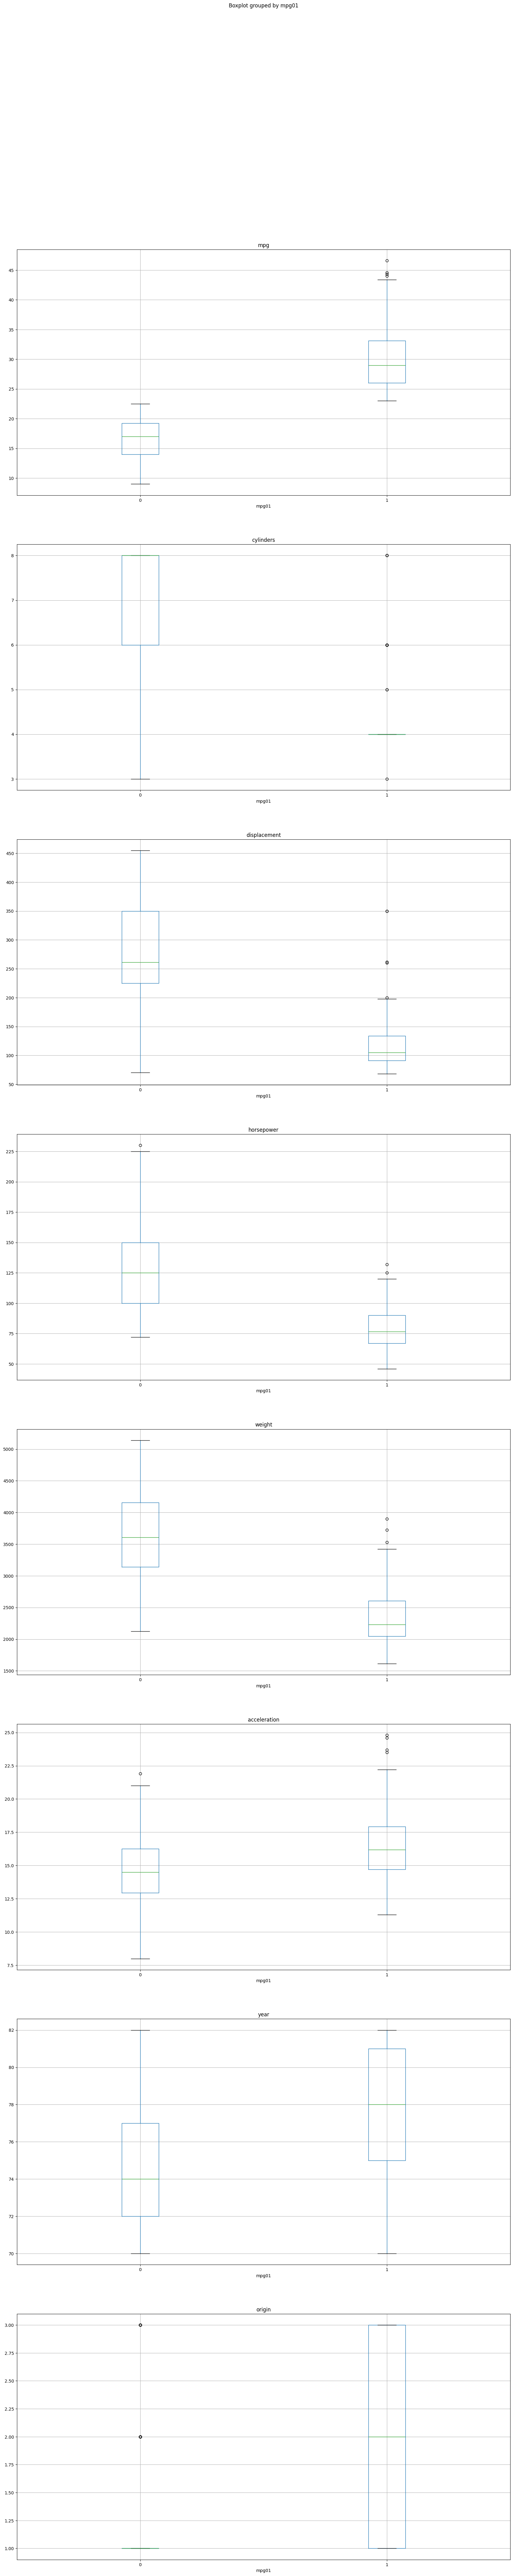

In [4]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(20,100))

for col, ax in zip(Auto.columns, axes):
    boxplot = Auto.boxplot(column = col, by = 'mpg01', ax=ax)

In [100]:
# c

from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test)= train_test_split(Auto.iloc[:,0:9] ,Auto['mpg01'],test_size=30,random_state=0)

In [101]:
# d 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train[['cylinders','displacement', 'horsepower', 'weight']] , y_train)
pred_lda = lda.predict(X_test[['cylinders', 'displacement', 'horsepower', 'weight']])
acc = (y_test == pred_lda).astype('int').mean()
print ('accuracy is %',acc*100)

accuracy is % 83.33333333333334


In [102]:
# e
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X_train[['cylinders','displacement', 'horsepower', 'weight']] , y_train)
pred_qda = qda.predict(X_test[['cylinders', 'displacement', 'horsepower', 'weight']])
acc = (y_test == pred_qda).astype('int').mean()
print ('accuracy is %',acc*100)

accuracy is % 80.0


In [103]:
# f
import statsmodels.api as sm
glm = sm.GLM(y_train,X_train[['cylinders','displacement', 'horsepower', 'weight']],family=sm.families.Binomial())
results = glm.fit() 
#print(results.summary())
predictions = results.predict(X_test[['cylinders', 'displacement', 'horsepower', 'weight']])
acc = ((round(predictions).astype('int') == y_test).astype('int')).mean()
print ('accuracy is %',acc*100)

accuracy is % 80.0


In [112]:
# g
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train[['cylinders','displacement', 'horsepower', 'weight']] , y_train)
pred_NB = NB.predict(X_test[['cylinders','displacement', 'horsepower', 'weight']])
acc = ((pred_NB == y_test).astype('int')).mean()
print ('accuracy is %',acc*100)

accuracy is % 83.33333333333334


In [131]:
# h
from sklearn.neighbors import KNeighborsClassifier 
for i in range(1,40,2):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train[['cylinders','displacement', 'horsepower', 'weight']] , y_train)
    knn1_pred = knn1.predict(X_test[['cylinders','displacement', 'horsepower', 'weight']])
    acc = ((knn1_pred == y_test).astype('int')).mean()
    print ('accuracy of k = ', i ,'is %',acc*100)

accuracy of k =  1 is % 86.66666666666667
accuracy of k =  3 is % 86.66666666666667
accuracy of k =  5 is % 86.66666666666667
accuracy of k =  7 is % 83.33333333333334
accuracy of k =  9 is % 83.33333333333334
accuracy of k =  11 is % 80.0
accuracy of k =  13 is % 80.0
accuracy of k =  15 is % 80.0
accuracy of k =  17 is % 80.0
accuracy of k =  19 is % 76.66666666666667
accuracy of k =  21 is % 83.33333333333334
accuracy of k =  23 is % 86.66666666666667
accuracy of k =  25 is % 83.33333333333334
accuracy of k =  27 is % 83.33333333333334
accuracy of k =  29 is % 83.33333333333334
accuracy of k =  31 is % 83.33333333333334
accuracy of k =  33 is % 83.33333333333334
accuracy of k =  35 is % 83.33333333333334
accuracy of k =  37 is % 83.33333333333334
accuracy of k =  39 is % 80.0
